In [248]:
images=next(iter(dataloader))
images[0].shape

torch.Size([32, 1, 28, 28])

In [249]:
x=images[0]

In [250]:
import torch.nn.init as init
in_features = 784
out_features = 128
kernel_dims = 64
batch_size=32

In [251]:
T = nn.Parameter(torch.Tensor(in_features, out_features, kernel_dims))
T.shape #those are learnable parameter

torch.Size([784, 128, 64])

In [252]:
#init.normal(T, 0, 1) #for intialization.

In [253]:
#x.permute(0,2,3,1).shape

In [254]:
x=x.view(batch_size,-1)
x.shape

torch.Size([32, 784])

In [217]:
T.shape

torch.Size([784, 128, 64])

In [232]:
print(x.shape)
print(T.view(in_features, -1).shape)

torch.Size([32, 784])
torch.Size([784, 8192])


In [221]:
matrices = x.mm(T.view(in_features, -1))
matrices.shape

torch.Size([32, 8192])

In [255]:
matrices.view(-1, out_features, kernel_dims).shape

torch.Size([32, 128, 64])

In [256]:
matrices = matrices.view(-1, out_features, kernel_dims)

In [257]:
matrices.shape

torch.Size([32, 128, 64])

In [258]:
M = matrices.unsqueeze(0)  # 1xNxBxC
M.shape

torch.Size([1, 32, 128, 64])

In [242]:
M_T = M.permute(1, 0, 2, 3)  # Nx1xBxC  l1 l2
M_T.shape 
[0,1,128,64]
[1,32,128,64]

torch.Size([32, 1, 128, 64])

In [259]:
torch.abs(M - M_T).shape

torch.Size([32, 32, 128, 64])

In [229]:
M_T.shape

torch.Size([32, 1, 128, 64])

In [241]:
torch.abs(M - M_T).shape

torch.Size([32, 32, 128, 64])

In [233]:
norm = torch.abs(M - M_T).sum(3) #N,N,B,C -> NNB
norm.shape

torch.Size([32, 32, 128])

In [236]:
expnorm = torch.exp(-norm)
expnorm.shape  
#Exponentiating the negative distances helps transform them into positive values.
#By exponentiating the negative distances,
#small distances are mapped to values closer to 1, resulting in lower impact on
#the overall minibatch discrimination process. This allows the module to focus more 
#on the larger and more significant differences between samples.

torch.Size([32, 32, 128])

In [ ]:
#Exponentiating the negative distances helps transform them into positive values.

In [238]:
o_b = (expnorm.sum(0) - 1) 

In [240]:
expnorm.sum(0).shape

torch.Size([32, 128])

In [265]:
print(o_b.shape)
print(x.shape)

torch.Size([32, 128])
torch.Size([32, 784])


In [127]:
x=x.view(in_features,-1)

In [237]:
x = torch.cat([x, o_b], 1)
x.shape

torch.Size([32, 912])

In [ ]:
#The reshaped matrices are then used to 
#calculate pairwise L1-norm distances between samples in the minibatch (norm) and exponentiate them (expnorm).

In [234]:
norm = torch.abs(M - M_T).sum(3)  # NxNxB #L1 between samples 

expnorm = torch.exp(-norm) 
o_b = (expnorm.sum(0) - 1)   # NxB, subtract self distance  #sum of explonation distance across the batch


x = torch.cat([x, o_b], 1)
x

NameError: name 'self' is not defined

In [192]:
class MinibatchDiscrimination(nn.Module):
    def __init__(self, in_features, out_features, kernel_dims, mean=False):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.kernel_dims = kernel_dims
        self.mean = mean
        self.T = nn.Parameter(torch.Tensor(in_features, out_features, kernel_dims))
        init.normal(self.T, 0, 1)

    def forward(self, x):
        # x is NxA
        # T is AxBxC
        print(x.shape)
        print(self.T.view(self.in_features, -1).shape)
        
        matrices = x.mm(self.T.view(self.in_features, -1))
        print(matrices.shape)
        matrices = matrices.view(-1, self.out_features, self.kernel_dims)
        
        M = matrices.unsqueeze(0)  # 1xNxBxC
        M_T = M.permute(1, 0, 2, 3)  # Nx1xBxC
        norm = torch.abs(M - M_T).sum(3)  # NxNxB
        expnorm = torch.exp(-norm)
        o_b = (expnorm.sum(0) - 1)   # NxB, subtract self distance
        if self.mean:
            o_b /= x.size(0) - 1

        x = torch.cat([x, o_b], 1)
        
        return x  (bx,features)

In [ ]:
matrices = matrices.view(-1, 64, 100)
matrices

In [266]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose 
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# this will grante that it runs on GPU if it availabe.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
transforms = Compose([
    ToTensor(),
    Normalize((0.5,), (0.5,))
])


training_data = FashionMNIST(
    root='./', train=True, transform=transforms, download=True)

test_data = FashionMNIST(root='./', train=False,
                         transform=transforms, download=True)


In [267]:
dataloader=DataLoader(training_data,batch_size=32)

In [268]:
images=next(iter(dataloader))
images[0].shape

torch.Size([32, 1, 28, 28])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


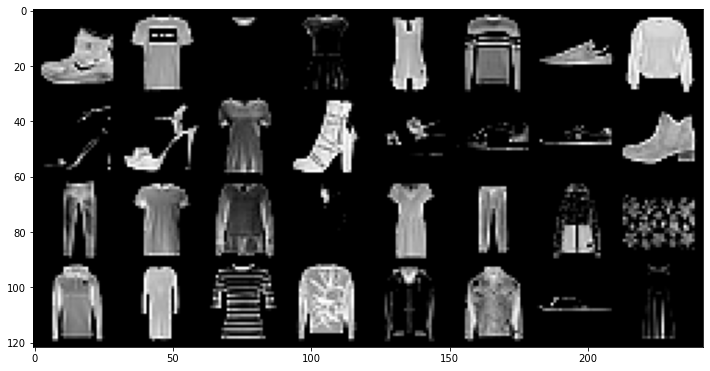

In [269]:
plt.figure(figsize=(12,12))
grid=torchvision.utils.make_grid(images[0])
thegrid=grid.permute(1,2,0)

plt.imshow(thegrid,cmap='coolwarm')

In [89]:
# img, label = training_data[sample_idx]

# img.permute(1,2,0).shape

# plt.imshow(img.permute(1,2,0),cmap='gray')

torch.randint(len(training_data), size=(1,)).item()

28123

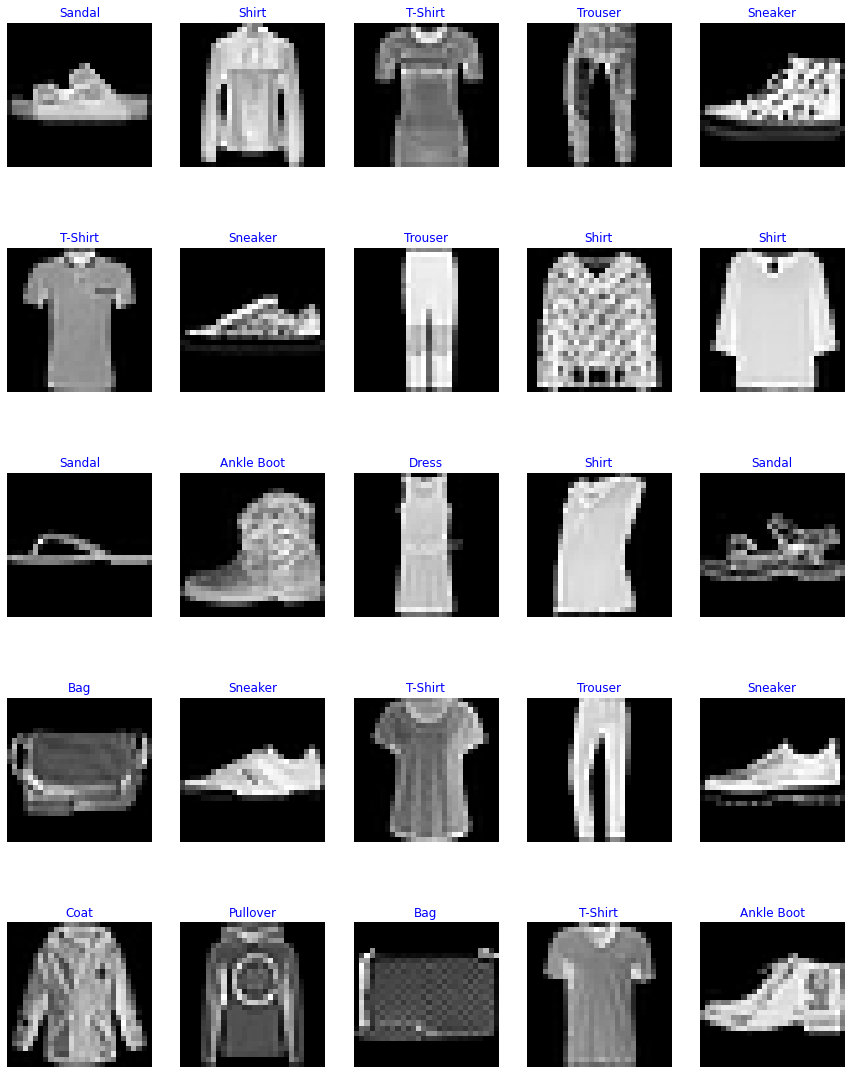

In [90]:
figure = plt.figure(figsize=(15, 20))

cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    
    plt.title(labels_map[label], color='blue')  # Set the label color to white
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")

plt.savefig('my_plot.png')

In [271]:

training_data = FashionMNIST(
    root='./', train=True, transform=transforms, download=False)

test_data = FashionMNIST(root='./', train=False,
                         transform=transforms, download=False)

batch_size = 32
training_loader = DataLoader(
    training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


def ShowData(images):
    '''
    Images: should be tuple of images and labels (images,labels)
    '''
    figure = plt.figure(figsize=(15, 20))

    row, col = 5, 5

    for i in range(1, row*col+1):
        randomindex = torch.randint(len(images), size=(1,)).item()
        image, label = images[randomindex]

        figure.add_subplot(row, col, i)
        plt.title(labels_map[label], color="Red")
        plt.axis('off')
        plt.imshow(image.permute(1, 2, 0), cmap="gray")

    plt.show()


class ConvNet(nn.Module):
    def __init__(self) -> None:
        super(ConvNet, self).__init__()

        # input_channels , output channels , kernal_size
        self.conv1 = nn.Conv2d(1, 3, 5)  # 24x24x3
        # this will divide the image dim into half
        self.pool = nn.MaxPool2d(2, 2)  # 12x12x3
        self.conv2 = nn.Conv2d(3, 16, 5)  # 8x8x16
        # 4x4x16
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4*4*16, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)  # we have 10 classes.

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 5

n_total_steps = len(training_loader)  # total Number of batches



In [280]:
import torch.nn.functional as F
import numpy as np

In [274]:

for epoch in range(1):

    for index, (images, labels) in enumerate(training_loader):

        # moving images and labels to gpu
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (index+1) % 10 == 0:

            print(
                f"Epoch {epoch+1}/{epochs} ,Step {index+1}/{n_total_steps},Loss {loss.item():.4f} ")

print("\n Traning is Done. ")

Epoch 1/5 ,Step 10/1875,Loss 2.2902 
Epoch 1/5 ,Step 20/1875,Loss 2.3158 
Epoch 1/5 ,Step 30/1875,Loss 2.3126 
Epoch 1/5 ,Step 40/1875,Loss 2.2929 
Epoch 1/5 ,Step 50/1875,Loss 2.2774 
Epoch 1/5 ,Step 60/1875,Loss 2.2638 
Epoch 1/5 ,Step 70/1875,Loss 2.2531 
Epoch 1/5 ,Step 80/1875,Loss 2.2294 
Epoch 1/5 ,Step 90/1875,Loss 2.2576 
Epoch 1/5 ,Step 100/1875,Loss 2.2683 
Epoch 1/5 ,Step 110/1875,Loss 2.1834 
Epoch 1/5 ,Step 120/1875,Loss 2.2561 
Epoch 1/5 ,Step 130/1875,Loss 2.1990 
Epoch 1/5 ,Step 140/1875,Loss 2.0471 
Epoch 1/5 ,Step 150/1875,Loss 2.1348 
Epoch 1/5 ,Step 160/1875,Loss 1.9516 
Epoch 1/5 ,Step 170/1875,Loss 2.1018 
Epoch 1/5 ,Step 180/1875,Loss 1.8849 
Epoch 1/5 ,Step 190/1875,Loss 1.7681 
Epoch 1/5 ,Step 200/1875,Loss 1.8140 
Epoch 1/5 ,Step 210/1875,Loss 1.7616 
Epoch 1/5 ,Step 220/1875,Loss 1.7225 
Epoch 1/5 ,Step 230/1875,Loss 1.6848 
Epoch 1/5 ,Step 240/1875,Loss 1.4572 
Epoch 1/5 ,Step 250/1875,Loss 1.4376 
Epoch 1/5 ,Step 260/1875,Loss 1.4439 
Epoch 1/5 ,Step 270/1

In [276]:
next(iter(test_loader))[1]

tensor([7, 4, 2, 6, 8, 9, 0, 3, 9, 4, 6, 4, 1, 9, 7, 8, 5, 1, 5, 6, 6, 9, 3, 3,
        6, 8, 2, 5, 2, 2, 2, 7])

In [282]:
with torch.no_grad():
    # for the whole dataset
    n_correct = 0
    n_samples = 0
    # for each class
    n_classes_correct = [0]*10
    n_classes_samples = [0]*10

    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        output = model(images)

        # (batch,10) 10 is the # of classes   is the output (batch,1) -> thenumber and the label i need the label
        _, predicte = torch.max(output, 1)

        n_samples += len(labels)
        n_correct += (predicte == labels).sum().item()

        # for each class now

        for i in range(batch_size):
            if i in labels:
                # labels will be each correct label in specific order [1,3,4,5]
                label = labels[i]
                # predict [1,2,4,2]   the 1 is 1 and 3 is not 2 wrong here and so on
                pred = predicte[i]

                # means we have seen this specific label (count how many times i have seen this specific class in the batch)
                # we can make it using dictionary if we don't know how many classes we have dict.get(label) get it and increase else intialize it then increase
                n_classes_samples[label] += 1

                if label == pred:
                    # label is the indicator for example 1 if it correctly predicted we increase index 1 as so on
                    n_classes_correct[label] += 1

    acc = 100.0 * n_correct/n_samples

    print(f" accuracy of network: {acc:.2f}% ")

    print("Correct classes for each class ", n_classes_correct)
    print("Total sample for each class ", n_classes_samples)

    n_classes_correct = np.array(n_classes_correct)
    n_classes_samples = np.array(n_classes_samples)

    acc = 100.0*(n_classes_correct/n_classes_samples)

    for i in range(10):
        print(f"Class {labels_map[i]} accuracy is {acc[i]:.2f} %")

 accuracy of network: 73.1700 % 
Correct classes for each class  [210, 242, 161, 221, 209, 287, 87, 230, 253, 281]
Total sample for each class  [281, 286, 316, 319, 285, 313, 315, 312, 285, 302]
Class T-Shirt accuracy is 74.73 %
Class Trouser accuracy is 84.62 %
Class Pullover accuracy is 50.95 %
Class Dress accuracy is 69.28 %
Class Coat accuracy is 73.33 %
Class Sandal accuracy is 91.69 %
Class Shirt accuracy is 27.62 %
Class Sneaker accuracy is 73.72 %
Class Bag accuracy is 88.77 %
Class Ankle Boot accuracy is 93.05 %
